In [44]:
from collections import defaultdict, Counter
from typing import List
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [10]:
users = [
    { 'id': 0, 'name': 'Hero' },
    { 'id': 1, 'name': 'Dunn' },
    { 'id': 2, 'name': 'Sue' },
    { 'id': 3, 'name': 'Chi' },
    { 'id': 4, 'name': 'Thor' },
    { 'id': 5, 'name': 'Clive' },
    { 'id': 6, 'name': 'Hicks' },
    { 'id': 7, 'name': 'Devin' },
    { 'id': 8, 'name': 'Kate' },
    { 'id': 9, 'name': 'Klain' }
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), 
                    (5, 7), (6, 8), (7, 8), (8, 9)]

In [11]:
# create a dictionary representing friends that the users have to 
# speed up the lookup operation
friendships = defaultdict(list)

for x, y in friendship_pairs:
    friendships[x].append(y) # y is a friend of x
    friendships[y].append(x) # conversly, x is a friend of y
    
for user, friends in friendships.items():
    print(f'{user}: {friends}')

0: [1, 2]
1: [0, 2, 3]
2: [0, 1, 3]
3: [1, 2, 4]
4: [3, 5]
5: [4, 6, 7]
6: [5, 8]
7: [5, 8]
8: [6, 7, 9]
9: [8]


In [14]:
# what is the average number of connections in our friendship graph?

# sum length of values in friendships, then divide by the number of users

# sum_of_connections = 0
# for connections in friendships.values():
#     sum_of_connections += len(connections)
    
sum_of_connections = sum([len(connections) for connections in friendships.values()])

print(f'average num. of connections: {sum_of_connections / len(users)}')

average num. of connections: 2.4


In [16]:
# which user has the most friends? 

# create a list of tuples (user_id, n_friends) and sort it on the second index
num_friends_by_id = [(user_id, len(friends)) for user_id, friends in friendships.items()]
num_friends_by_id = sorted(num_friends_by_id, key=lambda x: x[1], reverse=True)
print(num_friends_by_id)

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


In [27]:
# friend of a friend suggester - find all friends of your friends

# iterate through the friendships of a user
# for each friend, iterate through their friends and build a list of suggestions
def friends_of_friends(user_id: int) -> List[int]:
    foaf = []
    for friend in friendships[user_id]:
        for possible_friend in friendships[friend]:
            foaf.append(possible_friend)
    return set(foaf) 

# friends & friends of friends of user 0
print(f'friends & friends of friends (user 0): {friends_of_friends(0)}')

# exluding existing frinds of user 0 from the result
print(f'friends of friends (user 0): {friends_of_friends(0).difference(friendships[0])}')

friends & friends of friends (user 0): {0, 1, 2, 3}
friends of friends (user 0): {0, 3}


In [35]:
# getting number of mutual friends of a user

def friends_of_friends_imp(user_id: int) -> List[int]:
    foaf = []
    for friend in friendships[user_id]:
        for possible_friend in friendships[friend]:
            if possible_friend != user_id and possible_friend not in friendships[user_id]:
                foaf.append(possible_friend)
    return Counter(foaf)

# suggest friends for user 3
for possible_friend, count in friends_of_friends_imp(3).items():
    print(f'{count} mutual friends with user {possible_friend}')

2 mutual friends with user 0
1 mutual friends with user 5


In [36]:
# suggesting friends based on mutual interests
interests = [
    (0, 'hadoop'), (0, 'big data'), (0, 'hbase'), (0, 'java'),
    (0, 'spark'), (0, 'storm'), (0, 'cassandra'), (1, 'nosql'),
    (1, 'mongodb'), (1, 'cassandra'), (1, 'hbase'), (1, 'postgres'),
    (2, 'python'), (2, 'scikit-learn'), (2, 'scipy'), (2, 'numpy'),
    (2, 'statsmodels'), (2, 'pandas'), (3, 'r'), (3, 'python'),
    (3, 'statistics'), (3, 'regression'), (3, 'probability'), (4, 'machine learning'),
    (4, 'regression'), (4, 'decision trees'), (4, 'libsvm'), (5, 'python'),
    (5, 'r'), (5, 'java'), (5, 'c++'), (5, 'haskell'),
    (5, 'programming languages'), (6, 'statistics'), (6, 'probability'), (6, 'mathematics'),
    (6, 'theory'), (7, 'machine learning'), (7, 'scikit-learn'), (7, 'mahout'),
    (7, 'neural networks'), (8, 'neural networks'), (8, 'deep learning'), (8, 'big data'),
    (8, 'artificial intelligence'), (9, 'hadoop'), (9, 'java'), (9, 'mapreduce'),
    (9, 'big data')
]

In [43]:
# build dictionary of users per interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
# build dictionary of interests per user
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

# find user that has the most interests in common with a given user
# - iterate through the list of all users
# - for each user count the number of mutual interests 
def most_common_interests_with_user(user: int) -> int:
    mutual_interests = defaultdict(int)
    
    for u in users:
        user_id = u['id']
        # don't compare user with itself
        if user_id != user:
            mutual_interests[user_id] = len(set(
                interests_by_user_id[user]).difference(interests_by_user_id[user_id]))
            
    return sorted([(user_id, n_interests) for user_id, n_interests in mutual_interests.items()], 
                  key=lambda x: x[1])[0]

most_common_interests_with_user(0)


(9, 4)

In [54]:
# get the most interesting topic by simply counting the words
words = [interest for _, interest in interests]
word_counts = sorted(Counter(words).items(), key=lambda x: x[1], reverse=True)
word_counts

[('big data', 3),
 ('java', 3),
 ('python', 3),
 ('hadoop', 2),
 ('hbase', 2),
 ('cassandra', 2),
 ('scikit-learn', 2),
 ('r', 2),
 ('statistics', 2),
 ('regression', 2),
 ('probability', 2),
 ('machine learning', 2),
 ('neural networks', 2),
 ('spark', 1),
 ('storm', 1),
 ('nosql', 1),
 ('mongodb', 1),
 ('postgres', 1),
 ('scipy', 1),
 ('numpy', 1),
 ('statsmodels', 1),
 ('pandas', 1),
 ('decision trees', 1),
 ('libsvm', 1),
 ('c++', 1),
 ('haskell', 1),
 ('programming languages', 1),
 ('mathematics', 1),
 ('theory', 1),
 ('mahout', 1),
 ('deep learning', 1),
 ('artificial intelligence', 1),
 ('mapreduce', 1)]

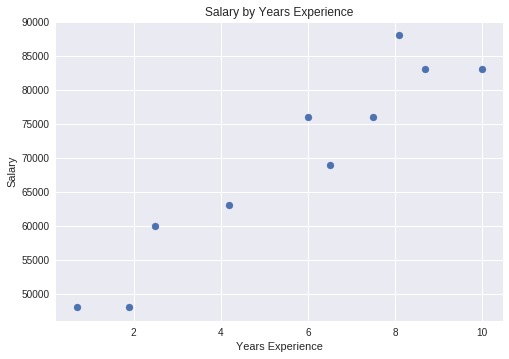

In [45]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

fig, ax = plt.subplots()
ax.scatter([x[1] for x in salaries_and_tenures], 
           [x[0] for x in salaries_and_tenures])
ax.set(title='Salary by Years Experience', xlabel='Years Experience', ylabel='Salary')

plt.show()

In [48]:
# split salaries into 3 groups and get average salary for each group: 
# - below 2 years
# - between 2 and 5 years 
# - more than 5 years 
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    if tenure < 2:
        salary_by_tenure_bucket['less than 2'].append(salary)
    elif tenure <= 5:
        salary_by_tenure_bucket['between 2 and 5'].append(salary)
    else:
        salary_by_tenure_bucket['more than 5'].append(salary)
        
average_salary_by_tenure_bucket = defaultdict(int)

for tenure, salaries in salary_by_tenure_bucket.items():
    average_salary_by_tenure_bucket[tenure] = sum(salaries) / len(salaries)
    
print(average_salary_by_tenure_bucket)

defaultdict(<class 'int'>, {'more than 5': 79166.66666666667, 'less than 2': 48000.0, 'between 2 and 5': 61500.0})


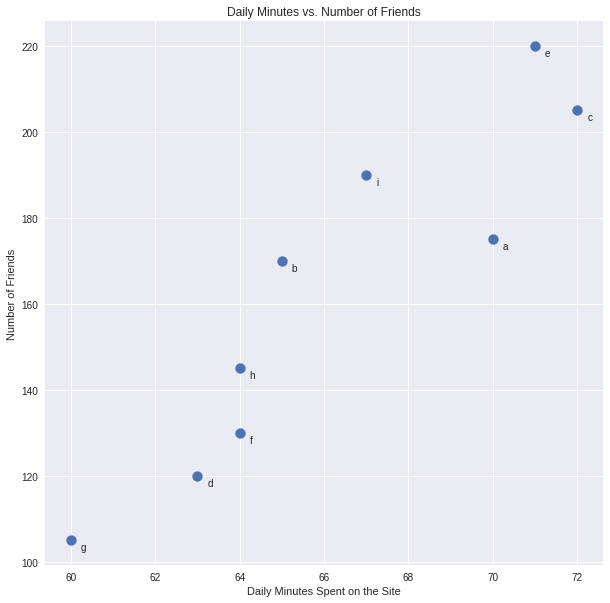

In [62]:
# annotating scatter plots 
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(friends, minutes, s=100)

for label, friend, minute in zip(labels, friends, minutes):
    ax.annotate(label, 
                xy=(friend, minute), 
                xytext=(10, -10),
                textcoords='offset points')
    
ax.set(title='Daily Minutes vs. Number of Friends', 
       xlabel='Daily Minutes Spent on the Site', 
       ylabel='Number of Friends')

plt.show()